<a href="https://colab.research.google.com/github/JohnSmith69969/ADS2002-Monash-Solar-Group/blob/main/Neural_Network_start_to_finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/monash_weather.csv')
solar_val = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/building_solar_values.csv')
nov_df = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/NOV_test_data.csv')

In [ ]:
solar_val = pd.concat([solar_val, nov_df], axis=0)

#Combine trianing and testing data

In [ ]:
solar_val = solar_val.drop(['Building0', 'Building1','Building3','Building4','Building5','Building6','Unnamed: 0'],axis=1)

#Drop unwated columns

In [ ]:
solar_val['Date'] = pd.to_datetime(solar_val['Date'])
solar_val.set_index('Date', inplace=True)
weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index('Date', inplace=True)
weather = weather.resample('15T').interpolate()

#Set date to index and interpolate weather data to change from hourly to 15 minutely

In [ ]:
weather = weather.drop(['Unnamed: 0'], axis = 1)
merged_df = pd.merge(weather, solar_val, on='Date', how='inner')
merged_df = merged_df.dropna(how = 'any')
merged_df = merged_df.iloc[2496:]

#Combine into final, useable csv, remove nan values and the missing, innacurate values from the start of the solar plots

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/merge_NN.csv')

In [4]:
nov_df = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/november.csv')
df = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/merge_NN.csv')

In [10]:
df1 = df.drop(['wind_speed (m/s)','dewpoint_temperature (degC)','mean_sea_level_pressure (Pa)','Date'], axis=1)
dataset = df1.values
df1.head()

#drop 3 most irrelevant variables according to RFE and covert to numpy arrays in prep for NN model

,temperature (degC),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1),Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,9.5300,0.8800,0.0,312.2000,0.64,0.01,0.0,0.0,0.0,0.0,0.0
1,9.5175,0.8825,0.0,316.0775,0.66,0.01,0.0,0.0,0.0,0.0,0.0
2,9.5050,0.8850,0.0,319.9550,0.68,0.01,0.0,0.0,0.0,0.0,0.0
3,9.4925,0.8875,0.0,323.8325,0.70,0.01,0.0,0.0,0.0,0.0,0.0
4,9.4800,0.8900,0.0,327.7100,0.72,0.01,0.0,0.0,0.0,0.0,0.0


In [13]:
features = dataset[:,0:5]
min_max_scaler = preprocessing.MinMaxScaler()
features_scale = min_max_scaler.fit_transform(features)

#assign features and scale them all to values between 0 and 1

In [16]:
labels = dataset[:,5]

#assign labels as desired solar panel

In [17]:
X_train = features_scale[:14000]
X_val = features_scale[14000:15648]
X_test = features_scale[15648:18528]
Y_train = labels[:14000]
Y_val = labels[14000:15648]
Y_test = labels[15648:18528]

#The test numbers represent the values that coincide exactly with the month of November
#The validation numbers represent 10% of the remaining data and the first 14,000 instances will be used as training data

In [18]:
learning_rate = 0.02
h1 = 200
h2 = 400
h3 = 256

#The learning rate is an initial starting point and will change during training
#The h variables represent the number of neurons in each of teh hidden layers

In [19]:
model = Sequential([
    Dense(h1, kernel_initializer='normal', activation='relu', input_shape=(5,)),
    Dropout(0.2),
    Dense(h2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(h3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='relu')
])

In [20]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss= 'mean_squared_error',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle])

#The implementation of the Adam optimizer allows for variation in the learning rate during training

In [21]:
history = model.fit(X_train, Y_train,
          batch_size=64, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
219/219 [==============================] - 6s 9ms/step - loss: 28.5912 - mean_squared_logarithmic_error: 0.4611 - val_loss: 64.9815 - val_mean_squared_logarithmic_error: 0.3469
Epoch 2/10
219/219 [==============================] - 2s 8ms/step - loss: 22.3339 - mean_squared_logarithmic_error: 0.3052 - val_loss: 48.2721 - val_mean_squared_logarithmic_error: 0.2542
Epoch 3/10
219/219 [==============================] - 2s 11ms/step - loss: 21.1274 - mean_squared_logarithmic_error: 0.2634 - val_loss: 54.3465 - val_mean_squared_logarithmic_error: 0.3409
Epoch 4/10
219/219 [==============================] - 2s 7ms/step - loss: 20.4389 - mean_squared_logarithmic_error: 0.2672 - val_loss: 50.9340 - val_mean_squared_logarithmic_error: 0.2436
Epoch 5/10
219/219 [==============================] - 2s 7ms/step - loss: 20.5523 - mean_squared_logarithmic_error: 0.2579 - val_loss: 45.5370 - val_mean_squared_logarithmic_error: 0.2588
Epoch 6/10
219/219 [==============================] - 2s 11

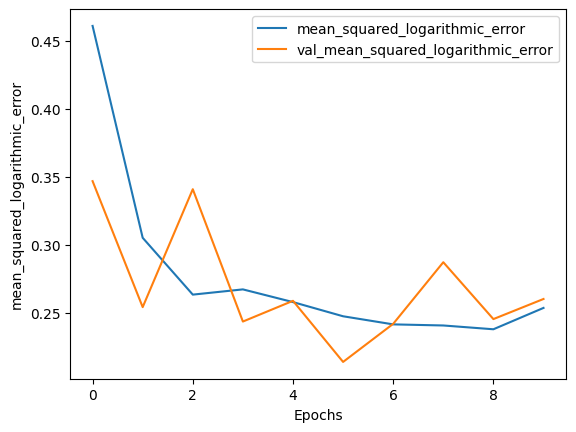

In [22]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
plot_history(history, 'mean_squared_logarithmic_error')

In [23]:
nov_df['prediction'] = model.predict(X_test)

#predict November values

90/90 [==============================] - 1s 6ms/step


In [24]:
solar = nov_df[['Date','Solar5','prediction']]
solar['Date'] = pd.to_datetime(solar['Date'])
solar.set_index('Date')

#prepare to plots

<ipython-input-24-4ed2c852f03d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['Date'] = pd.to_datetime(solar['Date'])


,Solar5,prediction
Date,,
2020-11-01 00:00:00,0.0,0.0
2020-11-01 00:15:00,0.0,0.0
2020-11-01 00:30:00,0.0,0.0
2020-11-01 00:45:00,0.0,0.0
2020-11-01 01:00:00,0.0,0.0
...,...,...
2020-11-30 22:45:00,0.0,0.0
2020-11-30 23:00:00,0.0,0.0
2020-11-30 23:15:00,0.0,0.0


<Axes: xlabel='Date'>

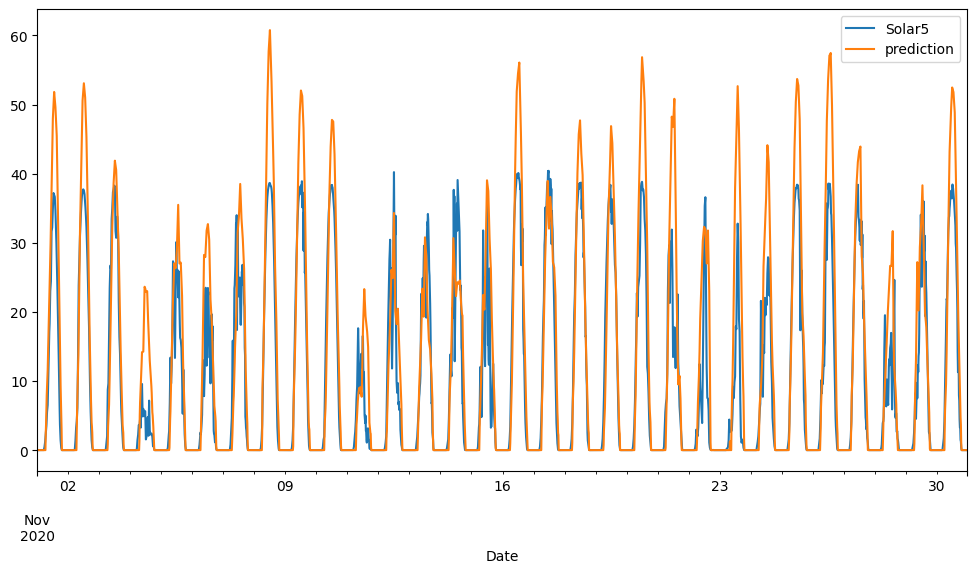

In [25]:
solar.plot.line(x = 'Date',y = ['Solar5','prediction'],figsize=(12, 6))

In [26]:
from sklearn.metrics import r2_score

r2_score(solar['Solar5'], solar['prediction'])

0.6926576354625775

In [ ]:
NN_final['prediction5'] = solar['prediction']

#compile results into dataframe

In [ ]:
NN_final.to_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/NN_final.csv')

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Solar Farm Data/CSV data/NN_final.csv')

#predictions dataframe

In [28]:
df= df.drop(['Unnamed: 0'],axis = 1)
df.describe()

,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5,prediction0,prediction1,prediction2,prediction3,prediction4,prediction5
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,12.621187,3.284271,3.257750,2.963542,1.927559,9.825847,13.008931,3.033794,2.712632,2.801082,1.631487,9.212842
std,16.269595,4.271744,4.262033,3.816336,2.528275,12.870132,16.320209,3.720923,3.439363,3.551990,2.039364,11.770329
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.680000,0.665000,0.650000,0.590000,0.360000,1.925000,5.074120,0.000000,0.808631,0.541718,0.000000,2.653402
75%,24.092500,6.240000,6.102500,5.765000,3.640000,18.730000,24.043917,6.184573,5.005267,5.344401,3.132928,17.282878
max,53.270000,12.730000,13.700000,11.320000,7.950000,40.410000,60.795334,11.683413,12.610243,13.016939,7.103968,46.010784


In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'])

,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5,prediction0,prediction1,prediction2,prediction3,prediction4,prediction5
Date,,,,,,,,,,,,
2020-11-01 00:00:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-01 00:15:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-01 00:30:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-01 00:45:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-01 01:00:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30 22:45:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-30 23:00:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-30 23:15:00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[:1440]

#half dataset

In [ ]:
ax = df.plot.line(x = 'Date',y = ['Solar2','prediction2'],figsize=(13, 6), title="Solar2, 0.833")
ax.set_ylabel("Solar Power Generated")

#plot 2 weeks of November data